In [1]:
from decouple import Config, RepositoryEnv
from json import dumps
import json
import openai
from langchain.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOpenAI
import pandas as pd
from pydantic import BaseModel, ValidationError, Field
from typing import List, Tuple , Union, Optional
from langchain.schema import HumanMessage, SystemMessage, AIMessage

In [2]:
from sentence_transformers import SentenceTransformer, util
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DOTENV_FILE = 'C:\\Users\\Tiziano Pacifico\\Desktop\\OpenAICourses\\.env'
env_config = Config(RepositoryEnv(DOTENV_FILE))
openai.api_key = env_config.get('CHATGPT_API_KEY')

In [4]:
path = "C:\\Users\\Tiziano Pacifico\\Desktop\\Applicativi personali\\Test LDA,keybert,bertopic\\Outputs\\"
filename = "LDA_results.json"

In [5]:
df = pd.read_json(path+filename,lines=True)

In [6]:
systemMessage = SystemMessage(content="""You will act as a topic label creator. \
You will create a label that identify a topic given a set of 10 keywords that are meaningfull for the topic. The topic can be one word or one short sentence, depending how many words you need\
                              to capture the essence of the text. The text will be given in input as human message. Give as output just the sentence or the words that identify the topic.\
                              The keywords list will be given as a result of a LDA alghoritm over a short article in the following format: ###\
                              (0.048*"influence" + 0.044*"celebrity" + 0.026*"trend" + 0.025*"society" + 0.024*"fashion" + 0.024*"opinion" + 0.022*"shape" + 0.021*"social" + 0.020*"public" + 0.018*"impact)\
                                where each number before the word state how important is the word in the topic description""")
            

In [9]:
df.head(1)

,Articolo,Argomento,Descrizione,Articoli preprocessati,Articolo_tokens,LDA topic,LDA keyword,LDA output
0,"Pop culture, short for popular culture, refers...",The Influence of Pop Culture on Society,Explore how popular culture trends influence f...,pop culture short popular culture refer collec...,"[pop, culture, short, popular, culture, refer,...",30,"[culture, influence, shape, medium, mass, popu...","0.052*""culture"" + 0.036*""influence"" + 0.030*""s..."


In [11]:
LDA_out = list(df['LDA output'].unique())

In [10]:
chat = ChatOpenAI(temperature=0.7, model="gpt-4")

In [13]:
GPT_topics = []
for i,out in enumerate(LDA_out):
    humanMessage=HumanMessage(content=f"Create a topic label for the following LDA output{out}")
    messages = [systemMessage, humanMessage]
    topic = chat(messages)
    print(f"elaborato messaggio n: {i}")
    GPT_topics.append((out,topic.content))
    if i%35 == 0 and i!=0:
        print("----------System Pause----------")
        time.sleep(80)
        print("----------system restart----------")

elaborato messaggio n: 0
elaborato messaggio n: 1
elaborato messaggio n: 2
elaborato messaggio n: 3
elaborato messaggio n: 4
elaborato messaggio n: 5
elaborato messaggio n: 6
elaborato messaggio n: 7


Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600).


elaborato messaggio n: 8
elaborato messaggio n: 9
elaborato messaggio n: 10
elaborato messaggio n: 11
elaborato messaggio n: 12
elaborato messaggio n: 13
elaborato messaggio n: 14
elaborato messaggio n: 15
elaborato messaggio n: 16
elaborato messaggio n: 17
elaborato messaggio n: 18
elaborato messaggio n: 19
elaborato messaggio n: 20
elaborato messaggio n: 21
elaborato messaggio n: 22
elaborato messaggio n: 23
elaborato messaggio n: 24
elaborato messaggio n: 25
elaborato messaggio n: 26
elaborato messaggio n: 27
elaborato messaggio n: 28
elaborato messaggio n: 29
elaborato messaggio n: 30
elaborato messaggio n: 31
elaborato messaggio n: 32
elaborato messaggio n: 33
elaborato messaggio n: 34
elaborato messaggio n: 35
----------System Pause----------
----------system restart----------
elaborato messaggio n: 36
elaborato messaggio n: 37
elaborato messaggio n: 38
elaborato messaggio n: 39
elaborato messaggio n: 40


In [14]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [17]:
for topic in GPT_topics_cleaned:
    print(topic[1])

Influence of Pop Culture on Social Norms and Behavior
Mindful Eating Practices
Financial Literacy and Informed Decision Making
Sustainable Fashion and Yoga Industry
Benefits of Regular Physical Exercise
Impact of Light on Sleep Patterns and Health
Project Team Management
Decision Making in E-commerce
Benefits of Reading and Language Learning
Social Media Brand Marketing
Effective Time Management and Productivity
Goal Setting in Positive Parenting
Education and Social Inequality
Promoting Cultural and Gender Diversity in Society
Work-Life Balance and Stress Management
Personal Finance Management
Effective Leadership and Communication
Benefits of Mindfulness and Meditation on Mental Health
Impact of Technology on Student Learning
Plastic Pollution and its Environmental Impact
Personal Growth and Positive Thinking
Consumer Behavior in Advertising
Environmental Conservation and Climate Change
Climate Change Impact and Consequences
Benefits of Outdoor Activities on Health
Impact of Video Ga

In [16]:
GPT_topics_cleaned = []
for topic in GPT_topics:
    if len(topic[1].split("\"")) > 1:
        GPT_topics_cleaned.append((topic[0],topic[1].split("\"")[1]))
    else:
        GPT_topics_cleaned.append(topic)

In [18]:
GPT_topics = GPT_topics_cleaned

In [19]:
df.head(1)

,Articolo,Argomento,Descrizione,Articoli preprocessati,Articolo_tokens,LDA topic,LDA keyword,LDA output
0,"Pop culture, short for popular culture, refers...",The Influence of Pop Culture on Society,Explore how popular culture trends influence f...,pop culture short popular culture refer collec...,"[pop, culture, short, popular, culture, refer,...",30,"[culture, influence, shape, medium, mass, popu...","0.052*""culture"" + 0.036*""influence"" + 0.030*""s..."


In [20]:
df_topic = []
for i, row in df.iterrows():
    for topic in GPT_topics:
        if topic[0] == row['LDA output']:
            df_topic.append(topic[1])

In [22]:
original_topic_embeddings = model.encode(list(df['Argomento']), convert_to_tensor=True)
GPT_topic_embeddings = model.encode(df_topic, convert_to_tensor=True)

In [23]:
sim = []
for a,b in zip(original_topic_embeddings,GPT_topic_embeddings):
    value = util.pytorch_cos_sim(a.unsqueeze(0), b.unsqueeze(0))
    sim.append(value.item())

In [24]:
max(sim)

0.9887341260910034

In [25]:
sum(sim)/len(sim)

0.7927805720766385

In [26]:
df['Similarity'] = sim

In [27]:
filename ="GPT_topic.txt"
with open(path+filename, "w") as file:
    for element in df_topic:
        file.write(element + "\n")

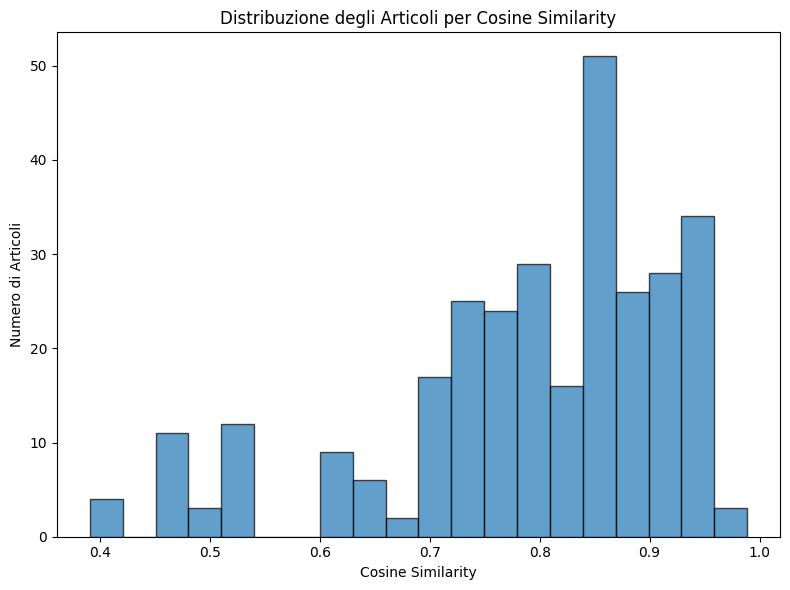

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(df['Similarity'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Cosine Similarity')
plt.ylabel('Numero di Articoli')
plt.title('Distribuzione degli Articoli per Cosine Similarity')
plt.tight_layout()

# Mostra il grafico
plt.show()

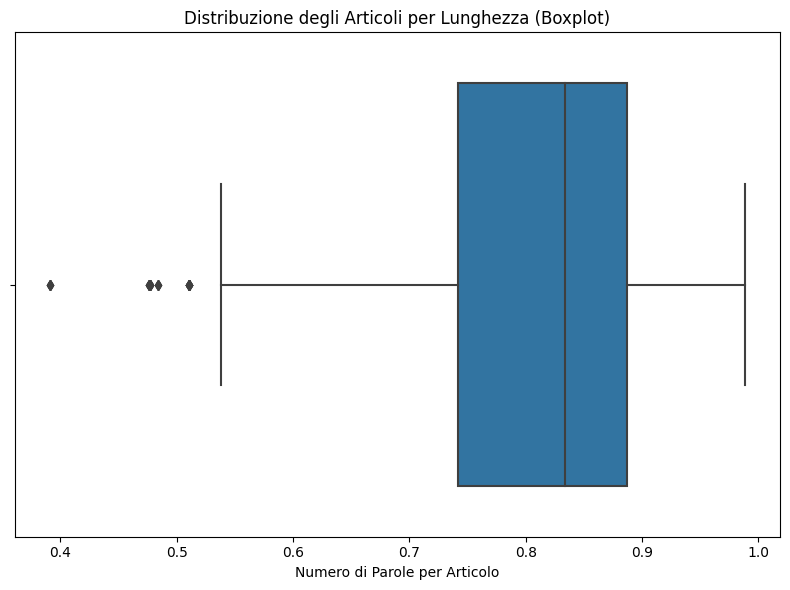

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Similarity', data=df)
plt.xlabel('Numero di Parole per Articolo')
plt.title('Distribuzione degli Articoli per Lunghezza (Boxplot)')
plt.tight_layout()

# Mostra il grafico
plt.show()

In [30]:
def reclass_similarity(similarity):
    start = 0.5
    end = 1.0
    classi = [x / 10.0 for x in range(int(start * 10), int(end * 10) + 1)]
    for classe in classi:
        if similarity < classe:
            return "< " + str(classe)

In [31]:
df = df.drop(['Articolo','Articoli preprocessati', 'Articolo_tokens','LDA topic','LDA keyword','LDA output'], axis=1)

In [32]:
df['GPT topic'] = df_topic

In [33]:
df['Similarity class'] = df['Similarity'].apply(reclass_similarity)

In [34]:
df_freq_sim = df.groupby('Similarity class').size().reset_index(name='Frequenza')

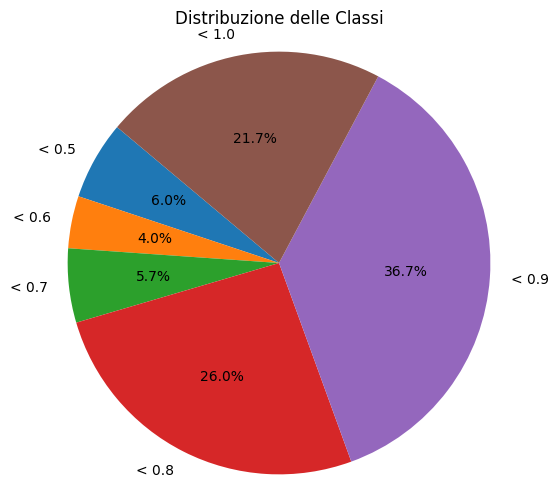

In [35]:
plt.figure(figsize=(6, 6))  # Imposta la dimensione del grafico
plt.pie(df_freq_sim['Frequenza'], labels=df_freq_sim['Similarity class'], autopct='%1.1f%%', startangle=140)

# Aggiunge un titolo
plt.title('Distribuzione delle Classi')

# Mostra il grafico
plt.axis('equal')  # Imposta gli assi per avere un aspetto circolare
plt.show()